In [1]:
#daily
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\begba\Desktop\GOOG.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\begba\\Desktop\\GOOG.csv'

In [ ]:
# Prepare the data
series = data['Close']  # Select the 'Close' price variable for analysis


In [ ]:
# Preprocessing
detrended_series = series - series.mean()  # Detrend the series by subtracting the mean


In [ ]:
# Compute the Fast Fourier Transform (FFT)
fft_values = np.fft.fft(detrended_series)

In [ ]:
# Compute the power spectrum (square of the magnitude of FFT values)
power_spectrum = np.abs(fft_values) ** 2


In [ ]:
# Compute the frequencies corresponding to the FFT values
n = len(detrended_series)
dt = 1  # Assuming the time interval between observations is 1 (change if needed)
frequencies = np.fft.fftfreq(n, dt)

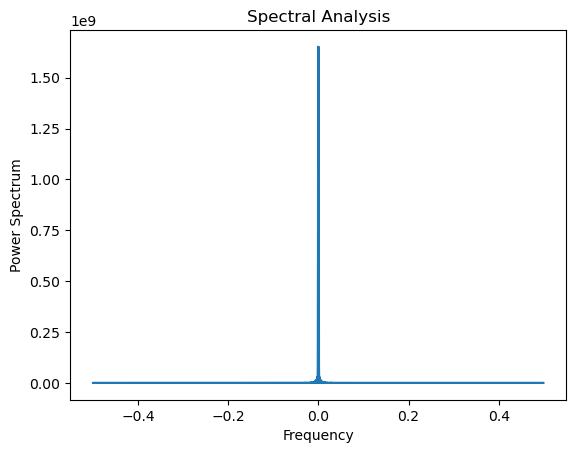

In [ ]:
# Plot the power spectrum
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Spectral Analysis')
plt.show()

In [ ]:
# Identify dominant frequencies
max_power_idx = np.argmax(power_spectrum)
dominant_frequency = frequencies[max_power_idx]
dominant_period = 1 / abs(dominant_frequency)
print('Dominant Frequency:', dominant_frequency)
print('Dominant Period:', dominant_period)

Dominant Frequency: -0.0004743833017077799
Dominant Period: 2108.0


In [ ]:

# Zoom in on a specific frequency range
frequency_range = (0, 0.1)  # Set the frequency range of interest
power_spectrum_zoomed = power_spectrum[(frequencies >= frequency_range[0]) & (frequencies <= frequency_range[1])]
frequencies_zoomed = frequencies[(frequencies >= frequency_range[0]) & (frequencies <= frequency_range[1])]


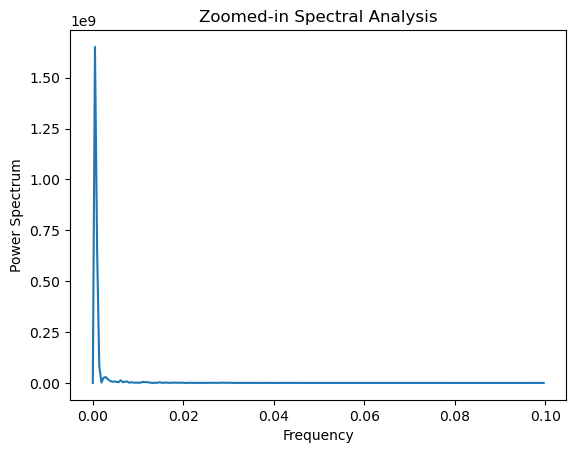

In [ ]:
# Plot the zoomed-in power spectrum
plt.plot(frequencies_zoomed, power_spectrum_zoomed)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Zoomed-in Spectral Analysis')
plt.show()

In [ ]:
from scipy.signal import periodogram
# Compute the periodogram
frequencies, power_spectrum = periodogram(series)

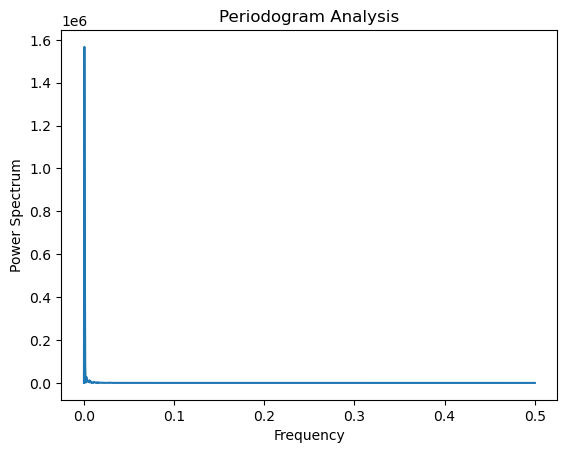

In [ ]:
# Plot the periodogram
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Periodogram Analysis')
plt.show()

In [ ]:
# Identify dominant frequencies
max_power_idx = np.argmax(power_spectrum)
dominant_frequency = frequencies[max_power_idx]
dominant_period = 1 / dominant_frequency
print('Dominant Frequency:', dominant_frequency)
print('Dominant Period:', dominant_period)

Dominant Frequency: 0.0004743833017077799
Dominant Period: 2108.0


In [ ]:
# Compute the Fast Fourier Transform (FFT)
fft_values = np.fft.fft(series)


In [ ]:
# Compute the power spectrum (square of the magnitude of FFT values)
power_spectrum = np.abs(fft_values) ** 2

In [ ]:
# Compute the frequencies corresponding to the FFT values
n = len(series)
dt = 1  # Assuming the time interval between observations is 1 (change if needed)
frequencies = np.fft.fftfreq(n, dt)

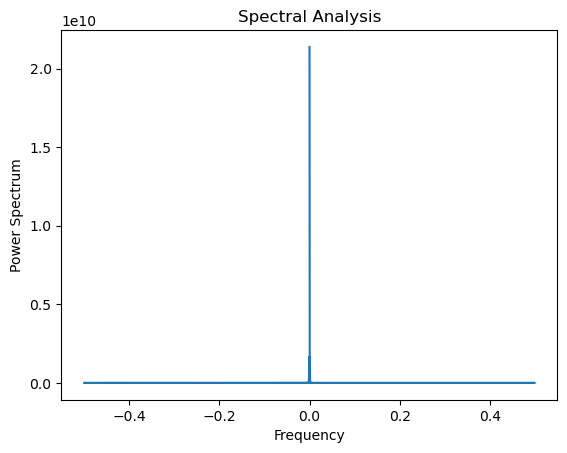

In [ ]:
# Plot the power spectrum
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Spectral Analysis')
plt.show()

In [ ]:
#montly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

In [ ]:
data = pd.read_csv(r'C:\Users\begba\Desktop\GOOG.csv')

In [ ]:
# Convert the 'Date' column to a datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

In [ ]:
# Resample the data to monthly frequency
monthly_data = data['Close'].resample('M').mean()

In [ ]:
# Prepare the data
series = monthly_data  # Select the 'Close' price variable for analysis

In [ ]:
# Compute the periodogram
frequencies, power_spectrum = periodogram(series)

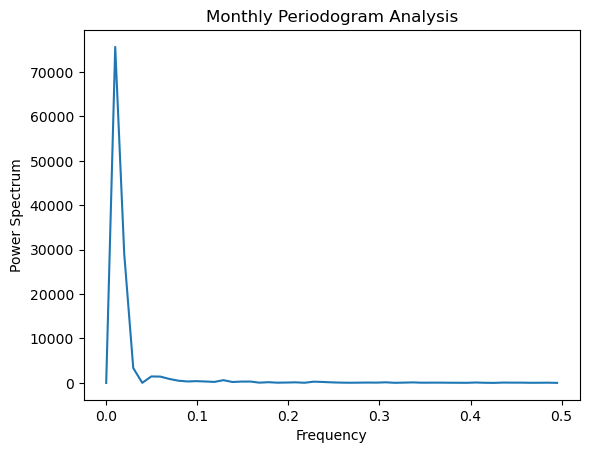

In [ ]:
# Plot the periodogram
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Monthly Periodogram Analysis')
plt.show()

In [ ]:

# Identify dominant frequencies
max_power_idx = np.argmax(power_spectrum)
dominant_frequency = frequencies[max_power_idx]
dominant_period = 1 / dominant_frequency
print('Dominant Frequency:', dominant_frequency)
print('Dominant Period:', dominant_period)


Dominant Frequency: 0.009900990099009901
Dominant Period: 101.0


In [ ]:
#weekly
# Resample the data to weekly frequency
weekly_data = data['Close'].resample('W').mean()

In [ ]:
# Prepare the data
series = weekly_data  # Select the 'Close' price variable for analysis

In [ ]:
from scipy.signal import welch
# Compute the power spectral density using Welch's method
frequencies, power_spectrum = welch(series)

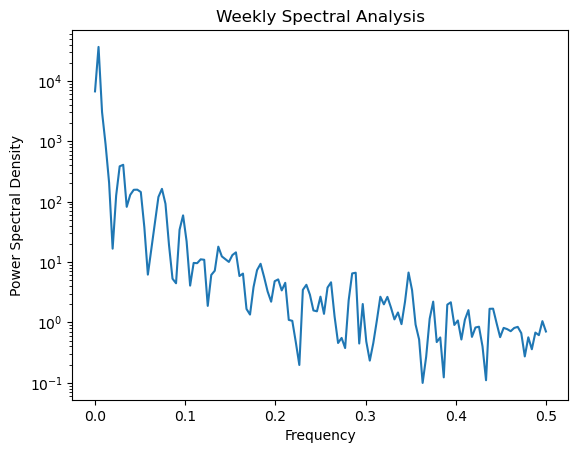

In [ ]:
# Plot the power spectral density
plt.semilogy(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Weekly Spectral Analysis')
plt.show()

In [ ]:
# Identify dominant frequencies
max_power_idx = np.argmax(power_spectrum)
dominant_frequency = frequencies[max_power_idx]
dominant_period = 1 / dominant_frequency
print('Dominant Frequency:', dominant_frequency)
print('Dominant Period:', dominant_period)

Dominant Frequency: 0.00390625
Dominant Period: 256.0
